<a href="https://colab.research.google.com/github/PalakAgrawal14/HR_Attrition_Random-Forest-Classification/blob/main/HR_Employee_Attrition_Palak_Agrawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas library 
import pandas as pd

In [ ]:
HR= pd.read_csv("HR-Employee-Attrition.csv")

In [ ]:
# Head function is used to present the top (defult=5) column of the data
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Gives number of rows and columns in the data
HR.shape

(1470, 35)

In [ ]:
# Gives statiscital information 
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# To check the null values 
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# counting the Attrition 
attrition_count = pd.DataFrame(HR['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


In [ ]:
# Import matplotlib and numpy libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7f3c45d569d0>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'yes')],
 [Text(-0.6995575805220109, 0.38809688421087607, '83.88%'),
  Text(0.5246681853915082, -0.29107266315815716, '16.12%')])

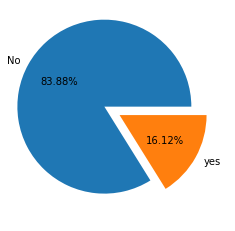

In [ ]:
# Creating pie chart
plt.pie(attrition_count['Attrition'], labels = ['No','yes'],autopct='%1.2f%%', explode=(0.2,0))

In [ ]:
HR.drop(['EmployeeCount' , 'EmployeeNumber'] , axis = 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# For creating dummy variables of Attrition Variable
attrition_dummies = pd.get_dummies(HR['Attrition'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
#for creating the dummy variable
HR = pd.concat([HR, attrition_dummies] , axis = 1)
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1,0


In [ ]:
#for removing the extra column
HR = HR.drop( columns= ['No'] )
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


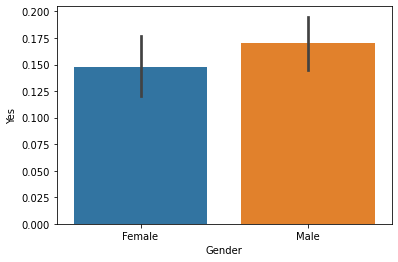

In [ ]:
# creating barplot using Aender and attrition variable 
sns.barplot(x = 'Gender' , y = 'Yes', data = HR)

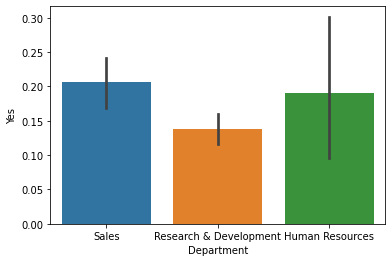

In [ ]:
# barplot with department and attrition
sns.barplot(x = 'Department' , y = 'Yes', data = HR)

In [ ]:
#Create a new column at the end of the dataframe that contains the same value 
HR['Age_Years'] = HR['Age']
#Remove the first column called age 
HR = HR.drop('Age', axis = 1)

In [ ]:
HR = HR.drop('Over18', axis = 1)

In [ ]:
HR = HR.drop('StandardHours', axis = 1)

In [ ]:
HR = HR.drop('EmployeeCount', axis = 1)

In [ ]:
HR.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,Age_Years
0,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,23
1,0,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,31
2,1,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,19
3,0,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,15
4,0,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,9


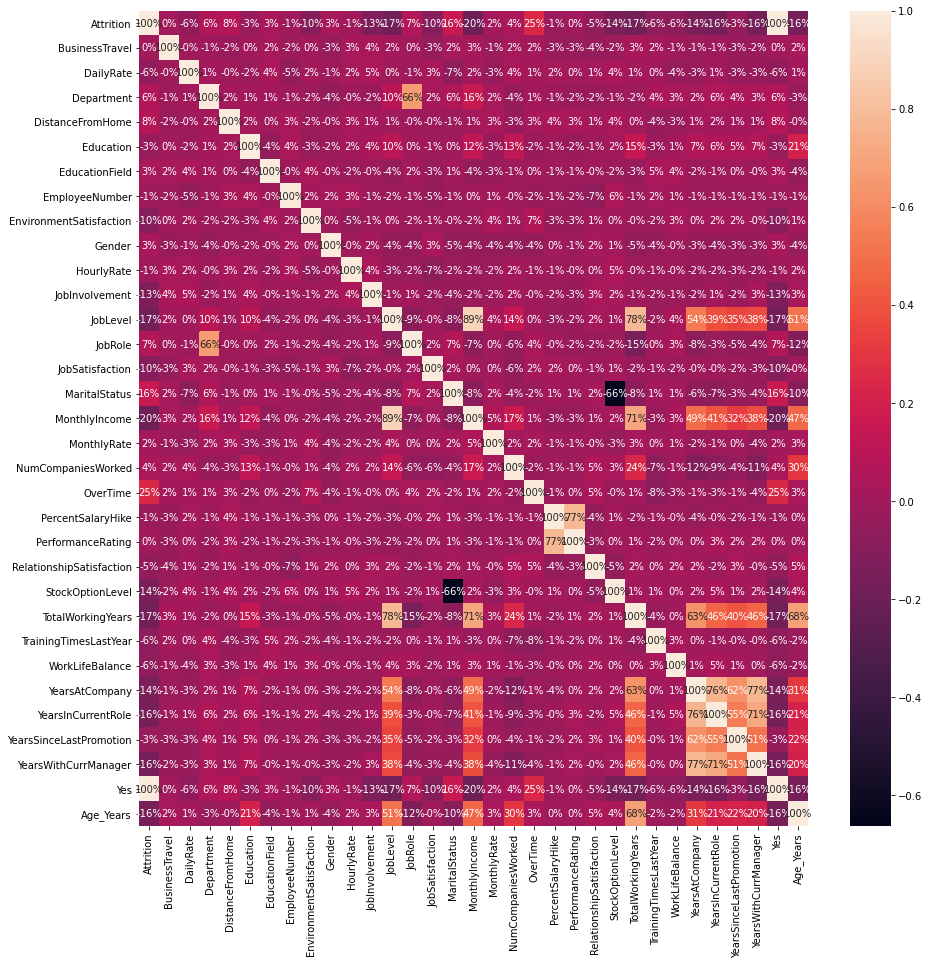

In [ ]:
# visualization of correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(HR.corr(), annot=True, fmt='.0%')

In [ ]:
for column in HR.columns:
        if HR[column].dtype == np.number:
            continue
        HR[column] = LabelEncoder().fit_transform(HR[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [ ]:
#Transform non-numeric columns into numerical columns using sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
for column in HR.columns:
    if HR[column].dtype==np.number:
        continue
    else:
        HR[column]=LabelEncoder().fit_transform(HR[column])
HR.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,Age_Years
0,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,23
1,0,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,31
2,1,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,19
3,0,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,15
4,0,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,9


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
x  = HR.drop(['Yes'], axis = 1)
y = HR['Yes']

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
x_train.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
338,0,2,295,2,4,2,2,0,338,3,0,0,1,1,7,2,0,816,194,1,0,0,2,0,2,0,3,10,2,2,10,9,1,2,12
363,1,2,159,2,4,2,2,0,363,3,0,4,2,0,8,2,2,298,416,1,0,1,2,0,1,0,0,1,2,2,1,0,0,0,15
759,0,2,437,0,23,3,3,0,759,1,1,6,2,0,1,1,2,88,365,1,0,0,5,0,0,0,0,6,3,2,6,3,0,4,27
793,0,2,502,1,14,1,1,0,793,0,1,20,2,0,2,2,0,94,1183,1,0,0,5,0,3,0,1,4,5,1,4,2,2,2,10
581,0,2,516,1,0,2,1,0,581,3,1,8,0,0,2,2,1,449,1298,3,0,0,10,1,2,0,2,7,2,2,2,2,0,2,12


In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = HR.iloc[:, 1:HR.shape[1]].values 
Y = HR.iloc[:, 0].values 
HR.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,Age_Years
0,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,23
1,0,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,31
2,1,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,19
3,0,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,15
4,0,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,9


In [ ]:
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Know the accuracy on the training data set
rf.score(x_train,y_train)

1.0

In [ ]:
#Confusion Matrix and score of the model on the test data
from sklearn.metrics import confusion_matrix
ConMatrix = confusion_matrix(y_test,rf.predict(x_test))

TN = ConMatrix[0][0]
TP = ConMatrix[1][1]
FN = ConMatrix[1][0]
FP = ConMatrix[0][1]

print(ConMatrix)
print('The model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[371   0]
 [  1  69]]
The model testing accuracy = 0.9977324263038548


In [ ]:
# Returns the feature importances (Higher value indicates the  feature is more important).
imp = pd.DataFrame({'feature':HR.iloc[:, 1:HR.shape[1]].columns,'importance':np.round(rf.feature_importances_,3)}) 
imp = imp.sort_values('importance',ascending=False).set_index('feature')
imp

ValueError: ignored